In [1]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

In [5]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth"""

    def __init__(self,model):
        super().__init__(model)
        self.wealth = 1

In [7]:
class MoneyModel(mesa.Model):
    """A model with some number of agents"""

    def __init__(self, n=10 , seed = None):
        super().__init__(seed=seed)
        self.num_agents = n
        MoneyAgent.create_agents(model=self,n=n)

In [34]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {self.unique_id!s} and my wealth is {self.wealth} rupees .")


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("say_hi")

In [35]:
starter_model = MoneyModel(10)
starter_model.step()

Hi, I am an agent, you can call me 3 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 2 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 5 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 4 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 10 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 6 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 1 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 8 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 9 and my wealth is 1 rupees .
Hi, I am an agent, you can call me 7 and my wealth is 1 rupees .


In [36]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

In [37]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(30):  # Runs the model for 30 steps;
    model.step()

# Note: An underscore is common convention for a variable that is not used.

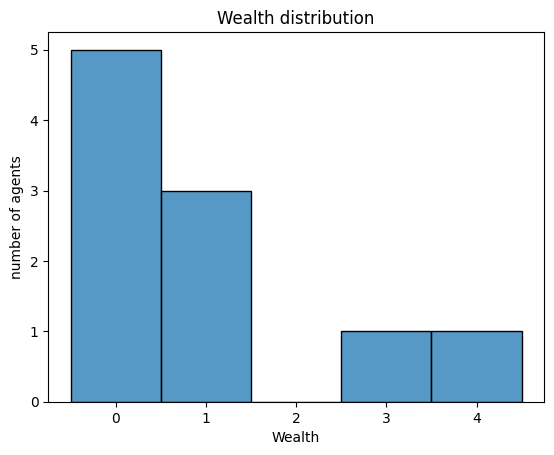

In [42]:
agent_wealth = [a.wealth for a in model.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="number of agents"
);  # The semicolon is just to avoid printing the object representation

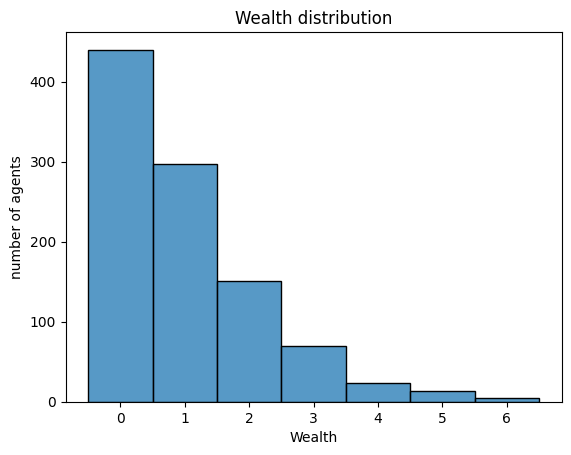

In [43]:
all_wealth = []
# This runs the model 100 times, each model executing 30 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");